# Tutorial things for SKLearn, Numpy, Numba etc.

In [1]:
import timeit
import numpy as np
# import julia

def mean(numbers: list):
    return sum(numbers)/len(numbers)

numbers = np.random.random(1_000_000) #list(range(1_000_000))
%timeit np.mean(numbers)

# %timeit mean(numbers) #standard implementation
# 37.2 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 35 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# %timeit np.mean(numbers) #numpy implementation
# 2.23 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# 2.38 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# 2.41 ms ± 70.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

def plot_digit(data, labels, index):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.imshow(data[index].reshape(8,8), cmap=plt.cm.gray_r)
    axes.set_title(f"{labels[index]} (index {index})")
    return

1.09 ms ± 9.26 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
data = digits["data"]
print("data:\n",data)
print("shape:",data.shape)
print("first and second digit:\n", data[0:2])
print("first and second digit, first 10 pixels:\n", data[0:2, :10])
labels = digits["target"]
# display(labels)

data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
shape: (1797, 64)
first and second digit:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
first and second digit, first 10 pixels:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]]


In [15]:
from sklearn.decomposition import PCA

n_components = 2

model = PCA(n_components)
data_trans = model.fit_transform(data)

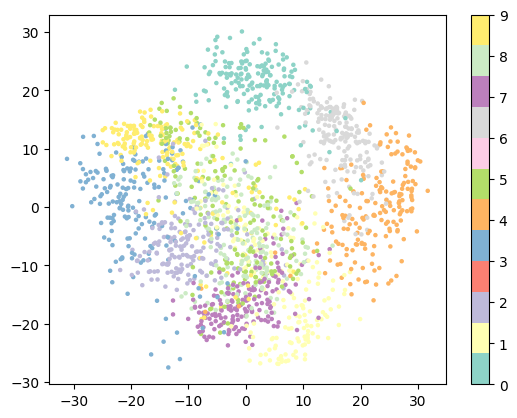

In [16]:
# plot_digit(data, labels, 412)

def plot_transform(transformed_data, n_components):
    plt.scatter(data_trans[:, 0],
                data_trans[:, 1],
                s=5,
                c=labels,
                cmap=plt.cm.Set3) if n_components == 2 else (
        plt.scatter(data_trans[:, 0],
                    data_trans[:, 1],
                    data_trans[:, 2],
                    c=labels,
                    cmap=plt.cm.Set3) if n_components == 3 else print("Number of components must be 2 or 3"))
    plt.colorbar()

plot_transform(data_trans, n_components)

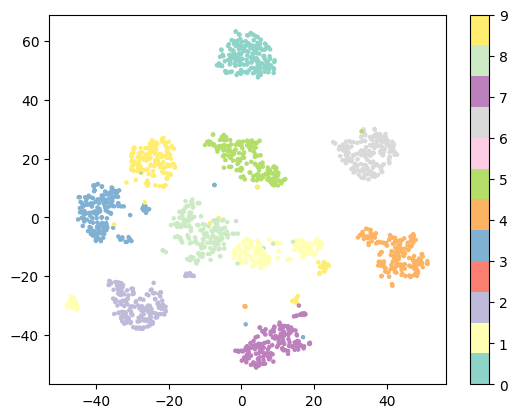

In [17]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
data_trans = model.fit_transform(data)

plot_transform(data_trans, 2)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support Vector Classifier

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3)

model = SVC(C=1, gamma=0.001)

# training model
model.fit(data_train, labels_train)

SVC(C=1, gamma=0.001)

In [19]:
# predict training data
prediction_train = model.predict(data_train)
prediction_test = model.predict(data_test)

0.9976133651551312
0.9851851851851852


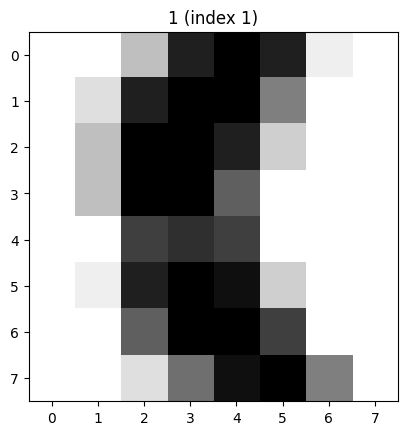

In [20]:
plot_digit(data_train, prediction_train, 1)
print((prediction_train == labels_train).mean())
print((prediction_test == labels_test).mean())

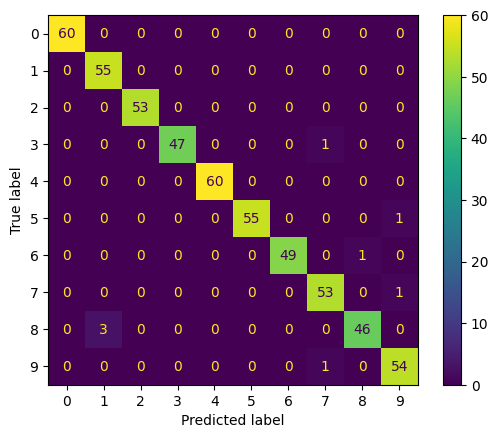

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, data_test, labels_test)

In [106]:
from sklearn.neural_network import MLPClassifier

MLPClassifier()

MLPClassifier()

In [ ]:
# Waveform fitting old stuffs

# Generalised logistic function
logfunc = lambda t, B, v, t_0: (1+np.exp(-B*(t-t_0)))**(-1/v)
logfunc_127 = lambda t, B, v, t_0: (1+np.exp(-B*(t/127-t_0)))**(-1/v)
t_0_shift = lambda B, v, xy_tup: xy_tup[0] + np.log(xy_tup[1]**(-v) - 1) / B
logfunc_xy = lambda t, B, v, xy_tup: (1+np.exp(-B*(t-t_0_shift(B, v, xy_tup))))**(-1/v)

col_for_str = lambda df, col: [c for c in df.columns if col in c][0]
# waveform = lambda df: {f"[{cn}]": df[col_for_colnum(df, cn)] for cn in range(len(df.columns))}
colcontains = lambda df, contains: df[col_for_str(df, contains)]
# t_0_shift = lambda B, v: 0.5 + math.log(0.5**(-v) - 1) / B

df = get_waveforms(3,5, source_data=data0)
for col in df.columns:
    df[col+" slope"] = df[col].diff()
#3
df["Logfunc3"] = [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)]
# df["Logfunc3_0"] = [logfunc_xy(t/127, 5, 0.1, (60/127,0.512045)) for t in range(0,128)]
#4
df["Logfunc4"] = [logfunc_xy(t/127, 7, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)]
# df["Logfunc4_0"] = [logfunc_xy(t/127, 7.2, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)]
df["Noise3"] = colcontains(df, "[3]") - df["Logfunc3"]
df["Noise4"] =colcontains(df, "[4]") - df["Logfunc4"]
square_sum = lambda series: (series*series).sum()
print(square_sum(df["Noise3"]),square_sum(df["Noise4"]))
#[["Noise3", "Noise4"]]
df.iplot(title="Example waveforms from the data")


# Try finding regression parameters using SciPy model fit

x_data = np.arange(0,128)
waveform = [3]
wave_df, imap = get_waveforms(waveform, source_data=data0, get_indices_map=True)
y_data = wave_df[imap[waveform[0]]]
B0, v0, x0, y0 = 4, 0.001, 60, y_data[60]
print(B0, v0, x0, y0, "timeshift", t_0_shift(B0, v0, (x0, y0)))



# plt.plot(x_data, y_data, 'b-', label='data with noise')

popt, pcov = curve_fit(logfunc_127, x_data, y_data, bounds=([0., 0.0001, -0.8], [10., 1., 0.8]))
print(popt, pcov)

# plt.plot(x_data, func(x_data, *popt), 'g--',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.7f' % tuple(popt))
wave_df[str(waveform)+' fit: B=%5.3f, v=%5.3f, t_0=%5.3f' % tuple(popt)] = logfunc_127(x_data, *popt)
wave_df['original fit'] = [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)] #[3]
# wave_df['original fit'] = [logfunc_xy(t/127, 7, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)] #[4]
wave_df["Noise original fit"] = colcontains(wave_df,str(waveform)) - wave_df['original fit']
wave_df["Noise fit"] = colcontains(wave_df,str(waveform)) - wave_df[str(waveform)+' fit: B=%5.3f, v=%5.3f, t_0=%5.3f' % tuple(popt)]
print("New fit:", square_sum(wave_df["Noise fit"]), "Original fit:", square_sum(wave_df["Noise original fit"]))
print("New fit:", np.sqrt(square_sum(wave_df["Noise fit"]))/128, "Original fit:", np.sqrt(square_sum(wave_df["Noise original fit"]))/128)

fig = wave_df.iplot(asFigure=True)
print(t_to_x(float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0])))
fig.add_vline(x=t_to_x(float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0])), line_color="orange")

# plt.plot(x_data, [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)], 'r-', label='original fit')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

# DOESNT OPTIMIZE :((
# params = curve_fit(logfunc_127, x_data, y_data, p0 = [B0, v0, t_0_shift(B0, v0, (x0, y0))], bounds=([0., 0.1, -0.5], [10., 1., 60.0]))
# print(params)
# least_squares(logfunc, x0 = , )

# ['[190]', '[528]', '[536]', '[715]', '[1035]', '[1536]', '[1780]', '[2111]',       <---- Pathologic waveforms
# '[2278]', '[2581]', '[2759]', '[2927]', '[3017]', '[3605]', '[3704]', '[3812]', 
# '[4066]', '[4658]', '[4797]', '[5517]', '[5633]', '[5677]', '[5777]', '[6085]',
# '[6250]', '[6261]', '[6755]', '[6887]', '[7023]', '[7038]', '[7674]', '[7827]',
# '[8129]', '[8573]', '[9606]', '[9608]', '[10356]', '[10550]', '[10626]', '[10686]',
# '[10979]', '[11017]', '[11915]', '[12050]', '[12141]', '[12251]', '[12306]', '[12655]',
# '[12879]', '[13504]', '[13977]', '[14159]', '[14345]', '[14598]', '[14758]', '[14854]',
# '[15700]', '[15798]', '[15841]', '[16000]', '[16100]', '[16181]', '[16403]', '[16595]',
# '[16909]', '[18015]', '[18074]', '[18409]', '[18648]']
waveform = [4066]
wave_df, imap = get_waveforms(waveform, source_data=data0, get_indices_map=True)

part = wave_df[wave_df[imap[waveform[0]]] <= 0.2][imap[waveform[0]]]
x_data = np.arange(0,len(part))
y_data = part
b_exp = lambda x, b, x_0: b**(x-x_0)
c_par = lambda x, a, x_0: a * (max(x - x_0,0))**2
c_par_arr = lambda x, a, x_0: np.array([c_par(x_,a,x_0) for x_ in x])

# Exp fit
popt, pcov = curve_fit(b_exp, x_data, y_data, bounds=([0.1, -10], [10, 70]))
print(popt, pcov)
wave_df['fit: b=%5.3f x_0=%5.3f' % tuple(popt)] = np.nan
wave_df['fit: b=%5.3f x_0=%5.3f' % tuple(popt)].iloc[:len(part)] = b_exp(x_data, *popt)
# Parabola fit
popt, pcov = curve_fit(c_par_arr, x_data, y_data, bounds=([-3, -10], [3, 40]))
print(popt)
wave_df['fit: a=%5.3f x_0=%5.3f' % tuple(popt)] = np.nan
wave_df['fit: a=%5.3f x_0=%5.3f' % tuple(popt)].iloc[:len(part)] = c_par_arr(x_data, *popt)
# wave_df['manual fit'] = b_exp(np.arange(0,len(wave_df)), 1.17, 47)
fig2 = wave_df.iplot(asFigure=True)
fig2.add_vline(x=t_to_x(float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0])), line_color="orange")